<a href="https://colab.research.google.com/github/Abdul-Rahman47896/ML_Spinal_deformation_Class_Prediction/blob/main/ML_Spinal_Deformation_Prdeiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project Objective:**

The main goal of this project is to demonstrate the ability to:
1. Clean and preprocess the dataset.
2. Utilize the dataset to train supervised learning algorithms.
3. Build a model that can predict patient conditions based on the provided biomechanic attributes.

#### **Dataset Description:**
• **Context**: Medical research university X is undergoing a deep research on patients with certain conditions (Spinal Deformation). Due to confidentiality the patient’s details and the conditions are masked by providing different datasets for developing a AIML model which can predict the condition of the patient depending on the received test results.

• **Data Description**: The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

**Columns:**
**P_incidence, P_tilt, L_angle, S_slope, P_radius, S_degree, Class**

## **Libraries and Packages**

In [ ]:
# Standard libraries for data analysis and visualization
import numpy as np                           # Library for numerical operations
import pandas as pd                          # Library for data manipulation
import matplotlib.pyplot as plt              # Library for data visualization
from scipy import stats                      # Library for statistical functions
import statsmodels.api as sm                 # Library for statistical modeling
import seaborn as sns                        # Library for enhanced data visualization
import matplotlib.ticker as mtick            # Library for customizing plot tick formats
from IPython.display import display          # Library for display settings
pd.options.display.max_columns = None        # Display all columns in DataFrames
from pandas.plotting import scatter_matrix   # Function for scatter matrix plots
from sklearn.metrics import roc_curve        # Function for plotting ROC curves
from google.colab import drive               # Library for Google Drive integration
import random                                 # Library for random number generation
import os                                     # Library for interacting with the operating system
import warnings                               # Library for warning suppression
warnings.filterwarnings("ignore")             # Ignore warnings
import ipywidgets as widgets                  #Python Widget tool
from IPython.display import display, clear_output
import time


# Sklearn modules for data preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler  # Preprocessing tools
from sklearn.model_selection import train_test_split  # Function for splitting data into train and test sets
from imblearn.over_sampling import SMOTE     # Library for handling class imbalance using SMOTE (Synthetic Minority Oversampling TEchnique)

# Sklearn modules for Model Selection
from sklearn.svm import SVC                  # Support Vector Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression Classifier
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors Classifier
from sklearn.naive_bayes import GaussianNB   # Gaussian Naive Bayes Classifier
from sklearn.tree import DecisionTreeClassifier    # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier

# Sklearn modules for Model Evaluation & Improvement
from scipy.stats import zscore               # Z-score function
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, log_loss, classification_report, fbeta_score  # Metrics for model evaluation
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold  # Model evaluation and improvement tools
from sklearn import feature_selection       # Feature selection techniques
from sklearn import model_selection         # Model selection functions
from sklearn import metrics                 # Various metrics for model evaluation
from sklearn.model_selection import KFold   # K-Fold cross-validation


In [ ]:

# Mount Google Drive
drive.mount('/content/drive')

# Define the file paths for your datasets in Google Drive
normal_file_path = '/content/drive/My Drive/BIA_Capstone_Project/Machine_Learning/Healthcare/Normal.csv'
type_h_file_path = '/content/drive/My Drive/BIA_Capstone_Project/Machine_Learning/Healthcare/Type_H.csv'
type_s_file_path = '/content/drive/My Drive/BIA_Capstone_Project/Machine_Learning/Healthcare/Type_S.csv'

# Load the datasets
normal_data = pd.read_csv(normal_file_path)
type_h_data = pd.read_csv(type_h_file_path)
type_s_data = pd.read_csv(type_s_file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **EDA and Data Cleaning**

In [ ]:
#Top 5 rows of each dataset
normal_data.head(20)


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
5,30.741938,13.354966,35.903526,17.386972,142.410107,-2.005373,Normal
6,50.913101,6.677000,30.896522,44.236102,118.151531,-1.057986,Normal
7,38.126589,6.557617,50.445075,31.568971,132.114805,6.338199,Normal
8,51.624672,15.969344,35.000000,35.655328,129.385308,1.009228,Nrmal
9,64.311867,26.328369,50.958964,37.983498,106.177751,3.118221,Nrmal


In [ ]:
type_h_data.tail(20)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
40,35.492446,11.701672,15.590363,23.790774,106.938852,-3.460358,type_h
41,46.442078,8.395036,29.037230,38.047043,115.481405,2.045476,type_h
42,53.854798,19.230643,32.779060,34.624155,121.670915,5.329843,type_h
43,66.285394,26.327845,47.500000,39.957549,121.219684,-0.799624,type_h
44,56.030218,16.297915,62.275275,39.732303,114.023117,-2.325684,type_h
45,50.912440,23.015169,47.000000,27.897271,117.422259,-2.526702,type_h
46,48.332638,22.227784,36.181993,26.104854,117.384625,6.481709,type_h
47,41.352504,16.577364,30.706191,24.775141,113.266675,-4.497958,type_h
48,40.557357,17.977784,34.000000,22.579573,121.046246,-1.537383,type_h
49,41.767732,17.899402,20.030886,23.868330,118.363389,2.062963,type_h


The Class column in all dataset doesn't have consistent data and having clerical errors.
Replacing all with appropriate class

In [ ]:
#Replacing with appropriate class
normal_data['Class'] = 'Normal'
type_h_data['Class'] = 'Type_H'
type_s_data['Class'] = 'Type_S'

In [ ]:
type_s_data.tail(20)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
130,43.718262,9.811985,52.000000,33.906277,88.434242,40.880923,Type_S
131,86.472905,40.303766,61.141012,46.169139,97.404189,55.752221,Type_S
132,74.469082,33.283157,66.942101,41.185925,146.466001,124.984406,Type_S
133,70.250436,10.340123,76.370070,59.910314,119.237007,32.666502,Type_S
134,72.643850,18.929117,68.000000,53.714733,116.963416,25.384247,Type_S
135,71.241764,5.268270,85.999584,65.973493,110.703107,38.259864,Type_S
136,63.772391,12.763385,65.360524,51.009006,89.822741,55.995454,Type_S
137,58.828379,37.577873,125.742385,21.250506,135.629418,117.314683,Type_S
138,74.854480,13.909084,62.693259,60.945396,115.208701,33.172255,Type_S
139,75.298478,16.671484,61.296204,58.626995,118.883388,31.575823,Type_S


In [ ]:
normal_data.tail(20)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
80,36.422485,13.879424,20.242562,22.543061,126.076861,0.179717,Normal
81,51.079833,14.209935,35.951229,36.869898,115.803711,6.905090,Normal
82,34.756738,2.631740,29.504381,32.124998,127.139849,-0.460894,Normal
83,48.902904,5.587589,55.500000,43.315316,137.108289,19.854759,Normal
84,46.236399,10.062770,37.000000,36.173629,128.063620,-5.100053,Normal
85,46.426366,6.620795,48.100000,39.805571,130.350096,2.449382,Normal
86,39.656902,16.208839,36.674857,23.448063,131.922009,-4.968980,Normal
87,45.575482,18.759135,33.774143,26.816347,116.797007,3.131910,Normal
88,66.507179,20.897672,31.727471,45.609507,128.902905,1.517203,Normal
89,82.905351,29.894119,58.250542,53.011232,110.708958,6.079338,Normal


In [ ]:
# Combine the tables into a single dataset
combined_data = pd.concat([normal_data, type_h_data, type_s_data], ignore_index=True)

In [ ]:
combined_data.tail(20)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
290,43.718262,9.811985,52.000000,33.906277,88.434242,40.880923,Type_S
291,86.472905,40.303766,61.141012,46.169139,97.404189,55.752221,Type_S
292,74.469082,33.283157,66.942101,41.185925,146.466001,124.984406,Type_S
293,70.250436,10.340123,76.370070,59.910314,119.237007,32.666502,Type_S
294,72.643850,18.929117,68.000000,53.714733,116.963416,25.384247,Type_S
295,71.241764,5.268270,85.999584,65.973493,110.703107,38.259864,Type_S
296,63.772391,12.763385,65.360524,51.009006,89.822741,55.995454,Type_S
297,58.828379,37.577873,125.742385,21.250506,135.629418,117.314683,Type_S
298,74.854480,13.909084,62.693259,60.945396,115.208701,33.172255,Type_S
299,75.298478,16.671484,61.296204,58.626995,118.883388,31.575823,Type_S


In [ ]:
combined_data.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [ ]:
combined_data.shape

(310, 7)

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
#Checking unique values in all columns
for x in combined_data:
  print(f"Unique count in {x} is {combined_data[x].nunique()}.")

Unique count in P_incidence is 310.
Unique count in P_tilt is 310.
Unique count in L_angle is 280.
Unique count in S_slope is 281.
Unique count in P_radius is 310.
Unique count in S_Degree is 310.
Unique count in Class is 3.


In [ ]:
combined_data['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

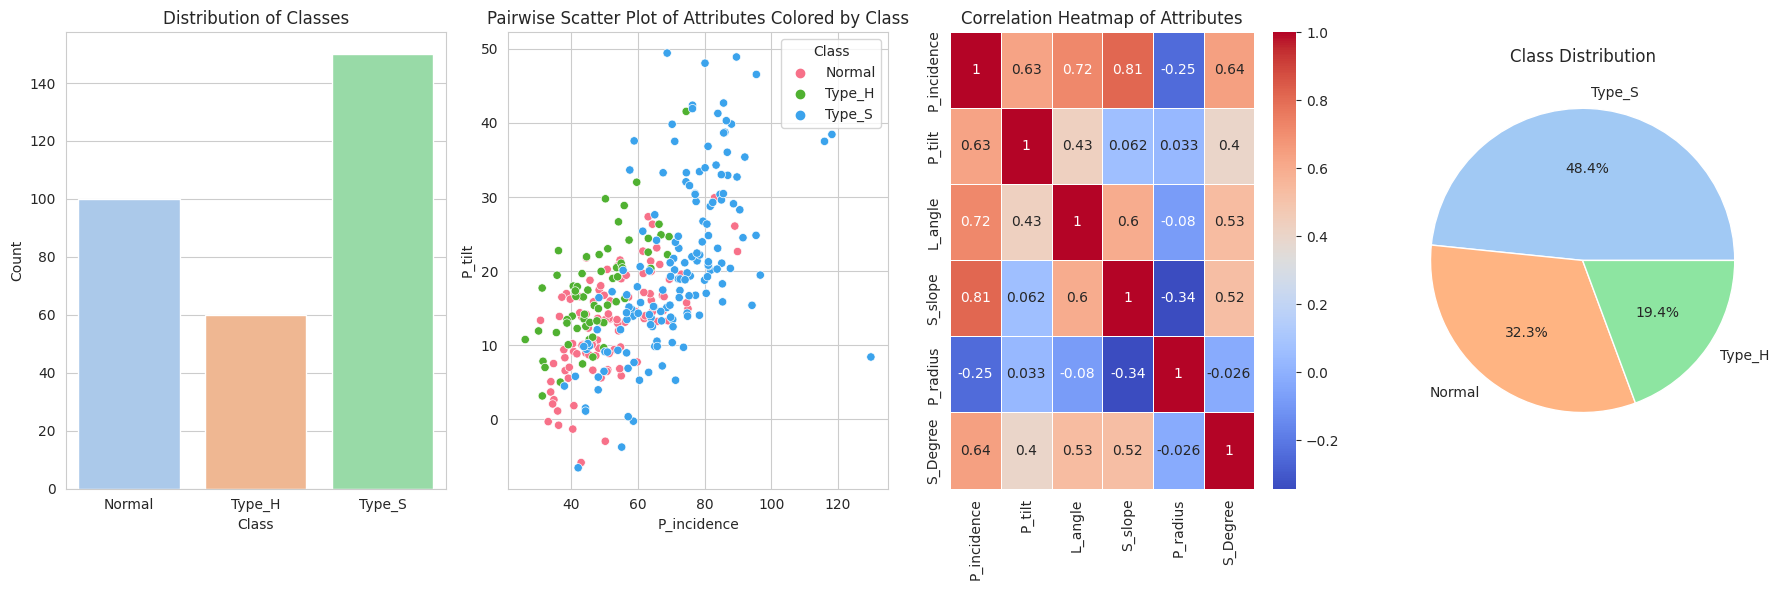

In [ ]:
# Set a background style for all plots
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Distribution of classes using a count plot
sns.countplot(x='Class', data=combined_data, ax=axes[0], palette='pastel')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Classes')

# Pairwise scatter plot of attributes colored by class
sns.scatterplot(data=combined_data, x='P_incidence', y='P_tilt', hue='Class', ax=axes[1], palette='husl')
axes[1].set_title('Pairwise Scatter Plot of Attributes Colored by Class')

# Correlation heatmap of attributes
correlation_matrix = combined_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[2])
axes[2].set_title('Correlation Heatmap of Attributes')

# Pie chart showing class distribution
class_counts = combined_data['Class'].value_counts()
axes[3].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[3].set_title('Class Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


Above charts helps us to unerstand the data distribution among the classes and Also we identified there is some more outliers in the scatter plot. Which need our attention for all columns to identify if there is anymore outliers.

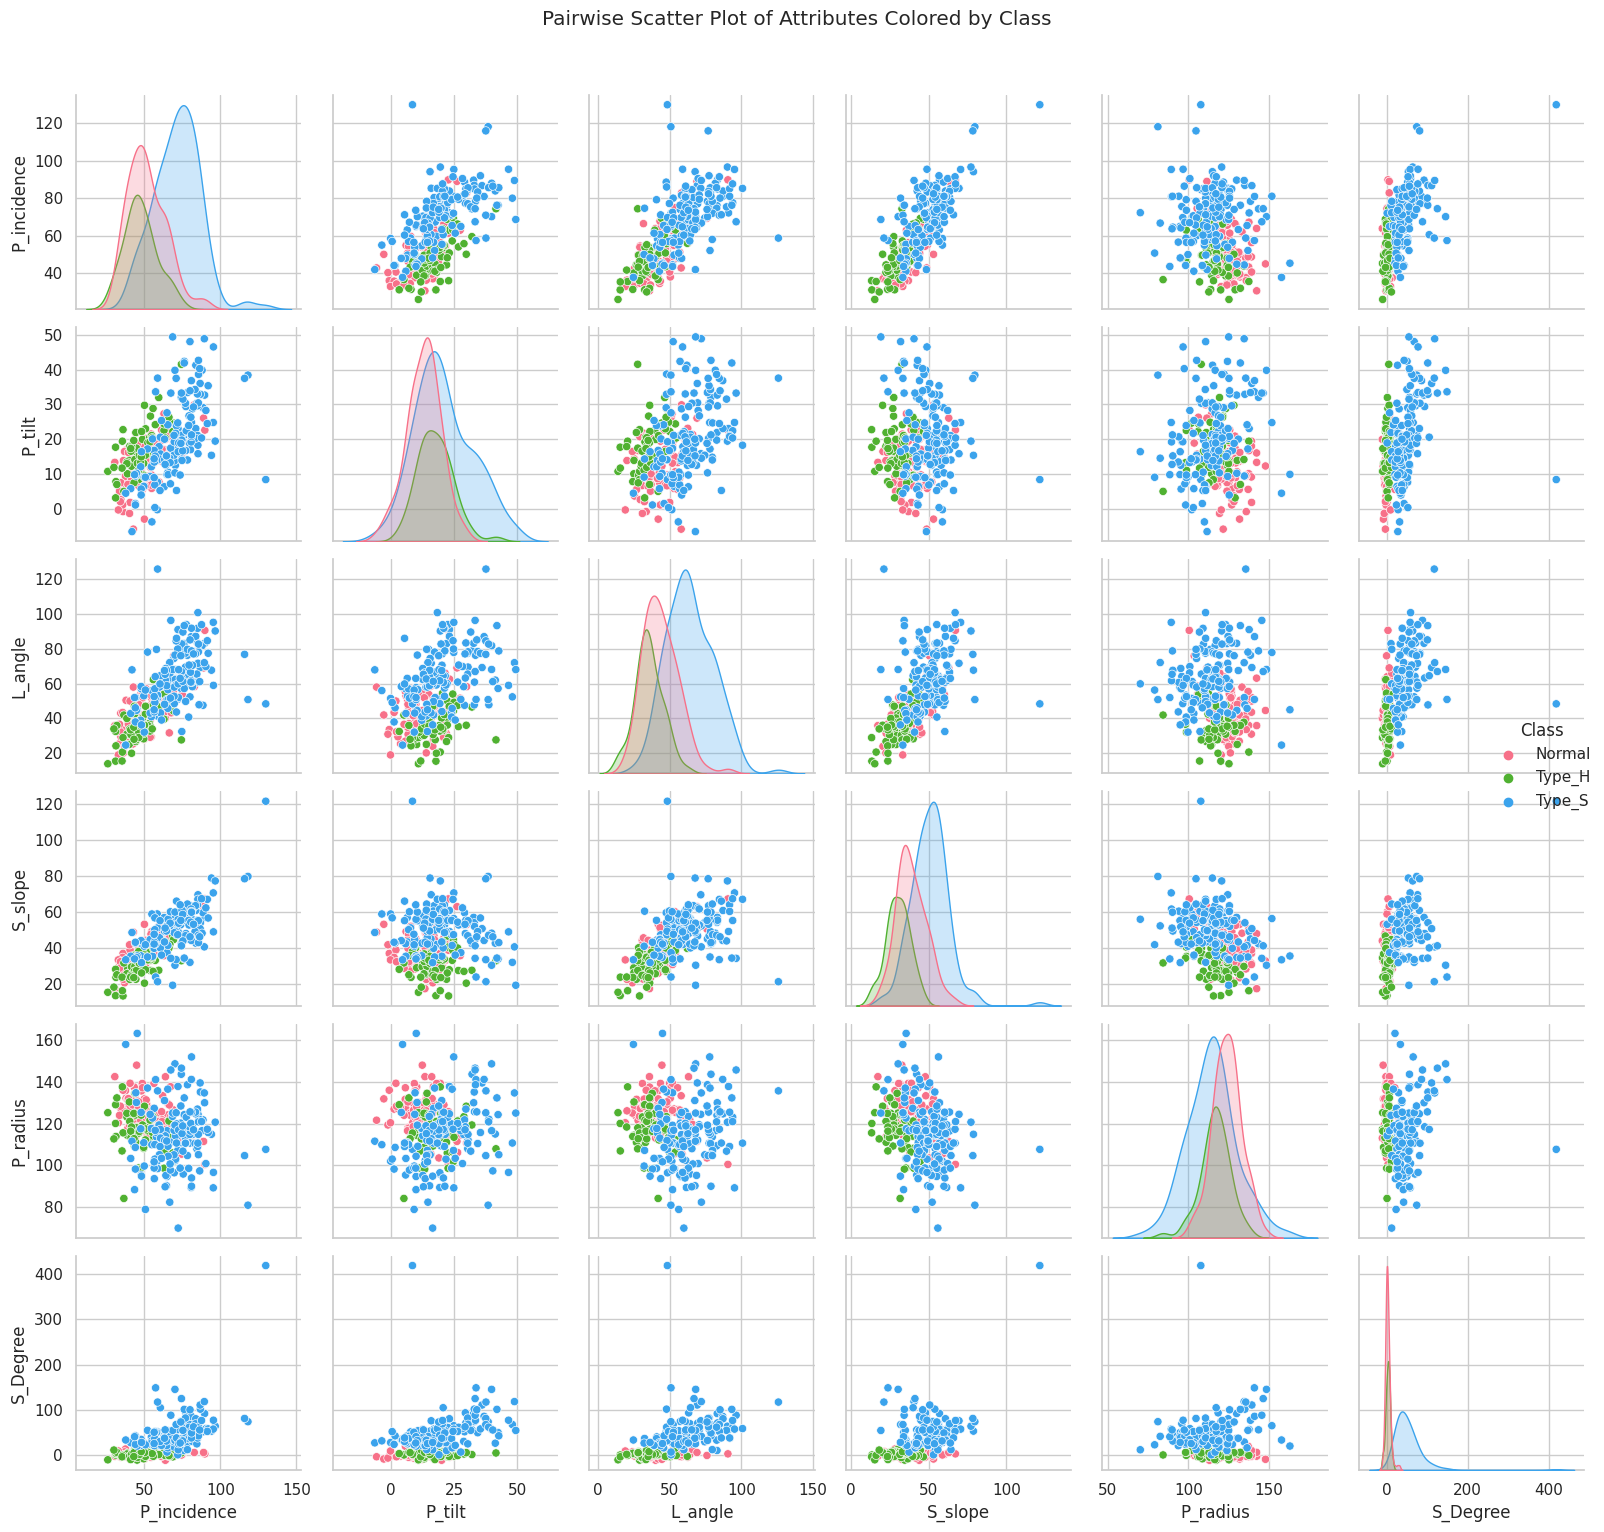

In [ ]:
# Pairwise scatter plot of attributes colored by class
sns.set(style="whitegrid")
sns.pairplot(data=combined_data, hue='Class', diag_kind='kde', palette='husl')
plt.suptitle("Pairwise Scatter Plot of Attributes Colored by Class", y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()


Upon review, We can observe that there are some outliers in aall columns. In order to handle that, we are using z score to identify the outliers to drop them by defining a threshold.


In [ ]:
# Find z-score of each data point
z_scores = np.abs(stats.zscore(combined_data.iloc[:, :-1]))

# Define a threshold for z-scores
z_threshold = 3

# Find outliers
outliers = np.where(z_scores > z_threshold)

# Remove outliers
outliers_indices = set()
for row, col in zip(outliers[0], outliers[1]):
    outliers_indices.add(row)

combined_data_cleaned = combined_data.drop(outliers_indices)


In [ ]:
combined_data_cleaned['Class'].value_counts()

Type_S    138
Normal    100
Type_H     60
Name: Class, dtype: int64

Checking if there is more outliers using plots.

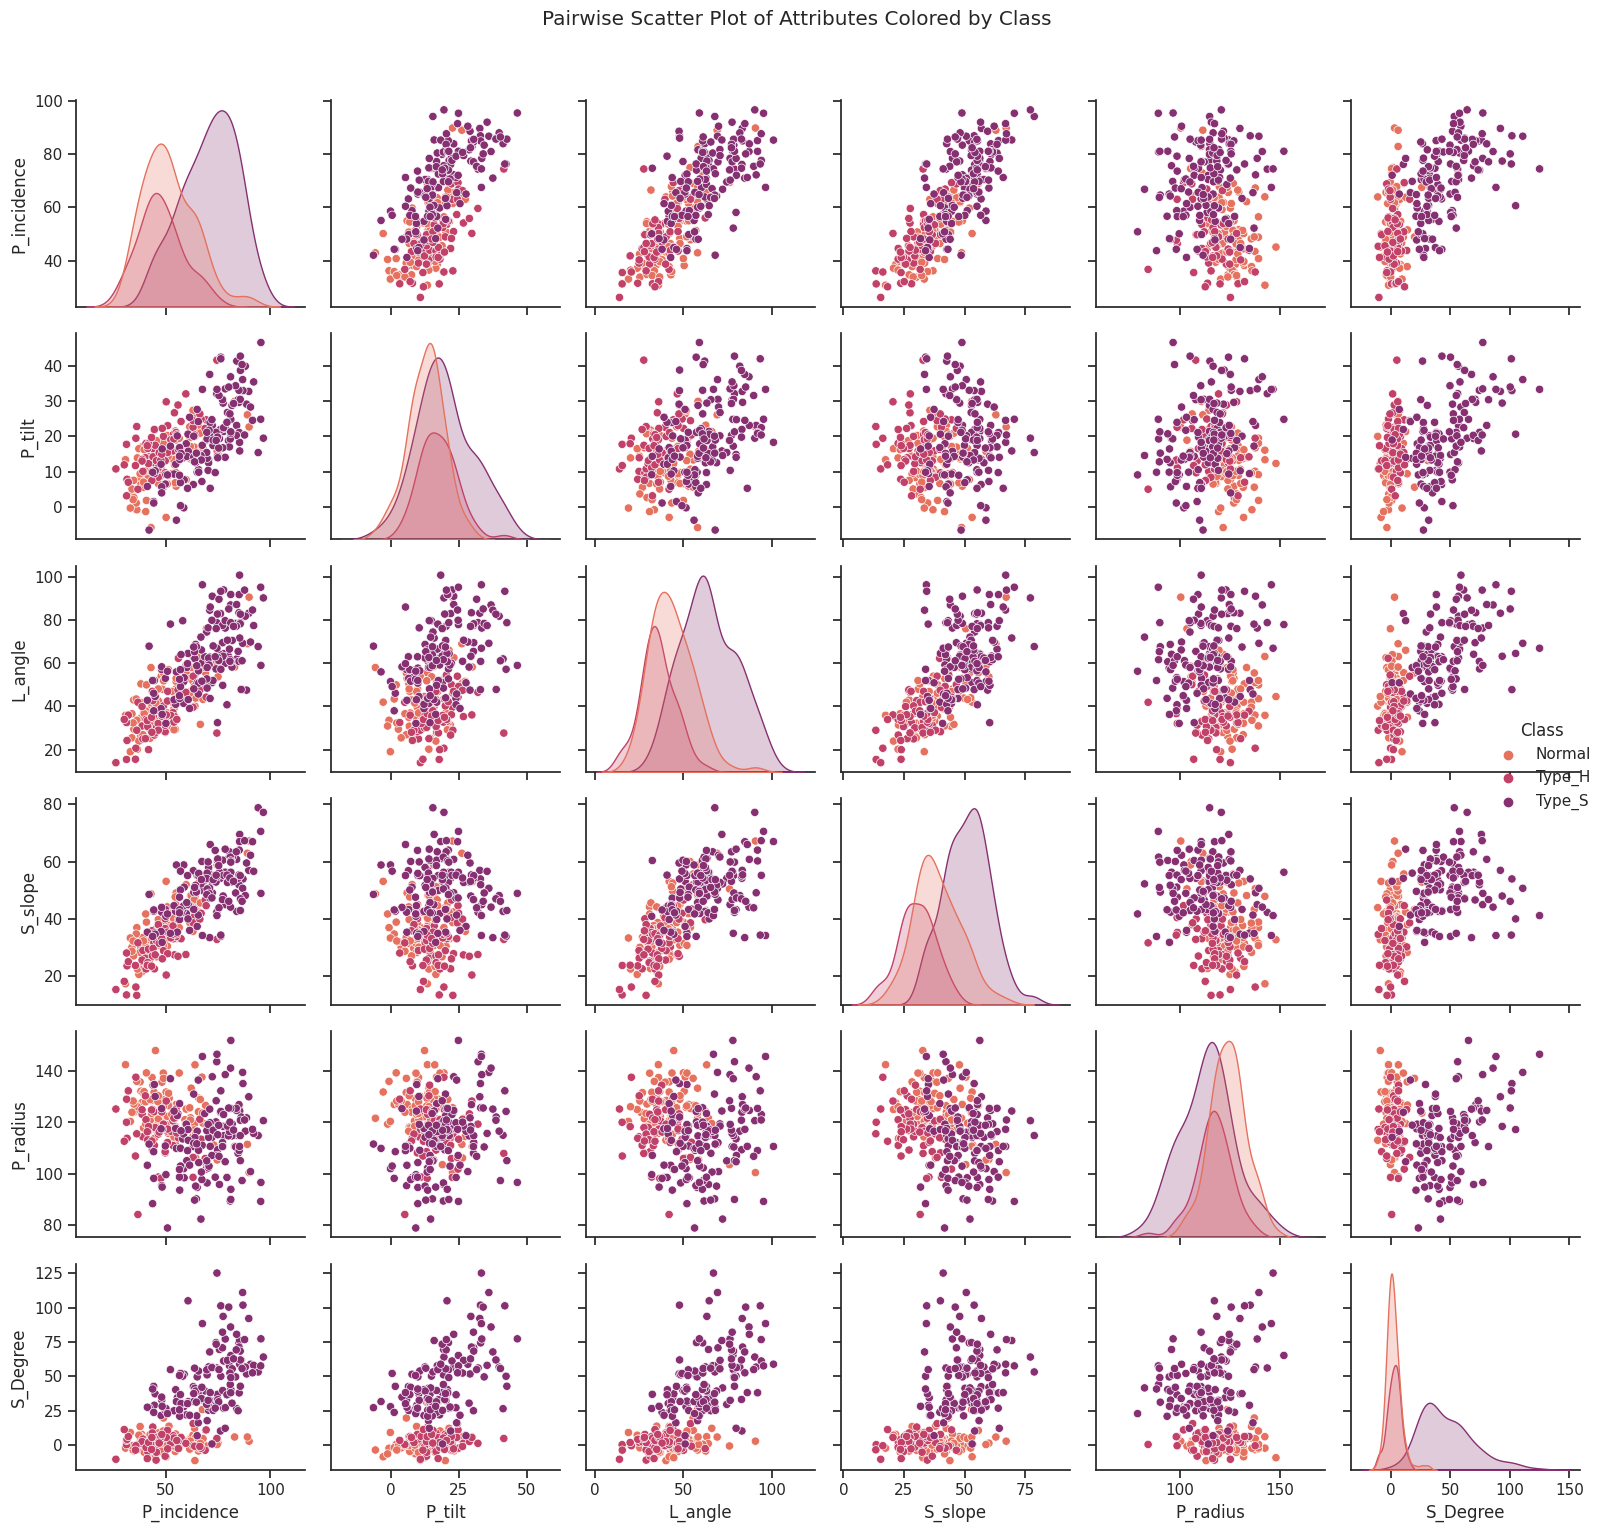

In [ ]:
# Pairwise scatter plot of attributes colored by class
sns.set(style="ticks")
sns.pairplot(data=combined_data_cleaned, hue='Class', diag_kind='kde', palette='flare')
plt.suptitle("Pairwise Scatter Plot of Attributes Colored by Class", y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

Comparing to previous now. This chart is promising.

In [ ]:
#Checking if there is null values missed
print("Checking if there is null values missed")
combined_data_cleaned.isna().sum()


Checking if there is null values missed


P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [ ]:
#Checking the dtypes
combined_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  298 non-null    float64
 1   P_tilt       298 non-null    float64
 2   L_angle      298 non-null    float64
 3   S_slope      298 non-null    float64
 4   P_radius     298 non-null    float64
 5   S_Degree     298 non-null    float64
 6   Class        298 non-null    object 
dtypes: float64(6), object(1)
memory usage: 18.6+ KB


In [ ]:
combined_data_cleaned.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,59.763407,16.998814,51.529372,42.764592,117.702979,23.020054
std,16.222761,9.288516,18.208260,12.296487,12.317615,27.511886
min,26.147921,-6.554948,14.000000,13.366931,78.999454,-11.058179
25%,46.399287,10.667069,36.676139,33.427411,110.890262,1.485015
50%,57.701081,16.015144,48.849001,42.460492,118.172283,9.893168
75%,72.476110,21.461892,62.817647,52.475365,125.316401,39.384173
max,96.657315,46.550053,100.744220,78.794052,151.839857,124.984406


## **Data Preprocessing**


In [ ]:
# Converting the categorical values into numerical using Label encoding
# Since we dont have identifiers and only single categorical column. We are doing a direct approach by labelling only

# class_mapping dictionary and correct any discrepancies
class_mapping = {'Normal': 0, 'Type_H': 1, 'Type_S': 2}

# Print unique values in 'Class' column
print(combined_data_cleaned['Class'].unique())

# Map class labels using class_mapping
combined_data_cleaned['Class'] = combined_data_cleaned['Class'].map(class_mapping)


['Normal' 'Type_H' 'Type_S']


In [ ]:
combined_data_cleaned['Class'].value_counts().sort_index()

0    100
1     60
2    138
Name: Class, dtype: int64

In [ ]:
# Separate features (X) and target variable (y)
X = combined_data_cleaned.drop('Class',axis=1)
y = combined_data_cleaned['Class']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (238, 6)
X_test shape: (60, 6)
y_train shape: (238,)
y_test shape: (60,)


To handle the data distribution issue. We are using SMOTE to balance the data distribution by oversamplig among all the classes.

In [ ]:
# Initialize SMOTE to oversample the data (Synthetic Minority Oversampling TEchnique)
smote = SMOTE(random_state=42)

# Resample the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the class distribution before and after resampling
print("Class distribution before resampling:")
print(y_train.value_counts())
print("\nClass distribution after resampling:")
print(pd.Series(y_train_resampled).value_counts())


Class distribution before resampling:
2    115
0     77
1     46
Name: Class, dtype: int64

Class distribution after resampling:
0    115
2    115
1    115
Name: Class, dtype: int64


## **Model Selection**

In [ ]:
#Model Selection
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Algorithm', 'Accuracy Mean', 'Accuracy STD', 'Precision Mean', 'Precision STD', 'Recall Mean', 'Recall STD', 'F1-Score Mean', 'F1-Score STD'])

# Evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_validate(model, X_train_resampled, y_train_resampled, cv=kfold,
                                                scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])
    acc_mean = cv_results['test_accuracy'].mean()
    acc_std = cv_results['test_accuracy'].std()
    precision_mean = cv_results['test_precision_macro'].mean()
    precision_std = cv_results['test_precision_macro'].std()
    recall_mean = cv_results['test_recall_macro'].mean()
    recall_std = cv_results['test_recall_macro'].std()
    f1_mean = cv_results['test_f1_macro'].mean()
    f1_std = cv_results['test_f1_macro'].std()
    results_df = results_df.append({'Algorithm': name, 'Accuracy Mean': acc_mean, 'Accuracy STD': acc_std,
                                    'Precision Mean': precision_mean, 'Precision STD': precision_std,
                                    'Recall Mean': recall_mean, 'Recall STD': recall_std,
                                    'F1-Score Mean': f1_mean, 'F1-Score STD': f1_std}, ignore_index=True)

# Print the results in tabular format
print(results_df.to_string(index=False))

               Algorithm  Accuracy Mean  Accuracy STD  Precision Mean  Precision STD  Recall Mean  Recall STD  F1-Score Mean  F1-Score STD
     Logistic Regression       0.793613      0.089568        0.668197       0.227791     0.636197    0.275643       0.639568      0.248814
                     SVC       0.860756      0.039034        0.724960       0.179197     0.741222    0.173662       0.712774      0.187161
              Kernel SVM       0.837395      0.092475        0.700437       0.238009     0.717369    0.244585       0.680091      0.252770
                     KNN       0.846303      0.056676        0.739829       0.152556     0.765879    0.175559       0.723531      0.163886
             Gaussian NB       0.761933      0.134060        0.642423       0.208176     0.637253    0.198825       0.595831      0.213847
Decision Tree Classifier       0.811429      0.061651        0.705921       0.173533     0.705200    0.185588       0.684146      0.190045
           Random Forest   

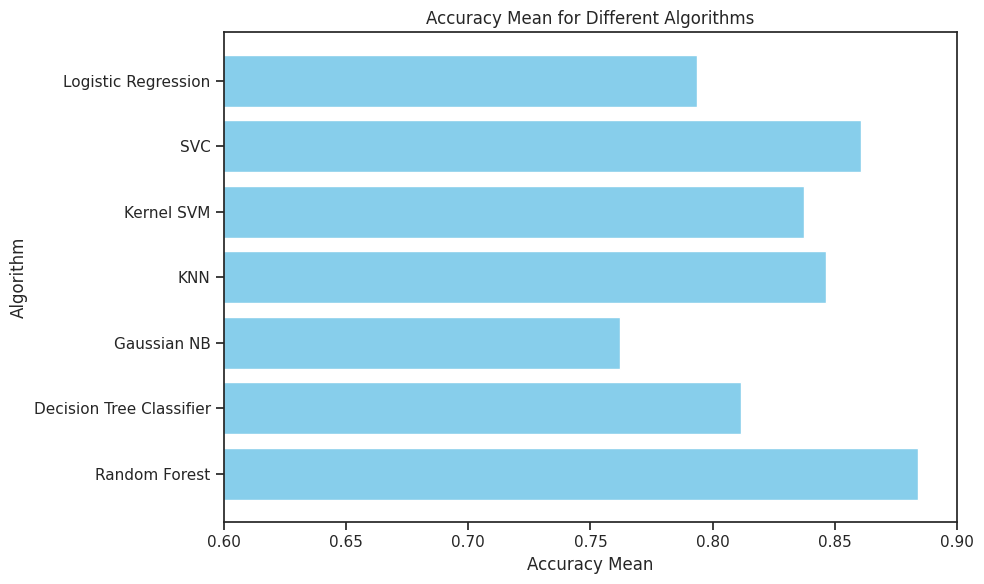

In [ ]:
# Algorithm names and corresponding accuracy mean values
algorithm_names = results_df['Algorithm']
accuracy_means = results_df['Accuracy Mean']

# Create a bar plot for Accuracy Mean for all algorithms
plt.figure(figsize=(10, 6))
plt.barh(algorithm_names, accuracy_means, color='skyblue')
plt.xlabel('Accuracy Mean')
plt.ylabel('Algorithm')
plt.title('Accuracy Mean for Different Algorithms')
plt.xlim(0.6, 0.9)  # Adjust the x-axis limits if needed
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy on top
plt.tight_layout()
plt.show()

We Understand that Random Forest has higher accuracy than other models. But we are also inclined to validate other metrics. In order to do that we are compelled to find which model has the best metric value individually.


In [ ]:
# Identify the algorithm with the highest accuracy mean
best_accuracy_algorithm = results_df.loc[results_df['Accuracy Mean'].idxmax()]

# Identify the algorithm with the highest precision mean
best_precision_algorithm = results_df.loc[results_df['Precision Mean'].idxmax()]

# Identify the algorithm with the highest recall mean
best_recall_algorithm = results_df.loc[results_df['Recall Mean'].idxmax()]

# Identify the algorithm with the highest F1-score mean
best_f1_algorithm = results_df.loc[results_df['F1-Score Mean'].idxmax()]

# Print the results for each metric
print("Best algorithm based on Accuracy:")
print(best_accuracy_algorithm)
print("\nBest algorithm based on Precision:")
print(best_precision_algorithm)
print("\nBest algorithm based on Recall:")
print(best_recall_algorithm)
print("\nBest algorithm based on F1-Score:")
print(best_f1_algorithm)


Best algorithm based on Accuracy:
Algorithm         Random Forest
Accuracy Mean          0.884034
Accuracy STD           0.055568
Precision Mean         0.730751
Precision STD          0.186797
Recall Mean            0.755163
Recall STD             0.163523
F1-Score Mean           0.72641
F1-Score STD           0.190116
Name: 6, dtype: object

Best algorithm based on Precision:
Algorithm              KNN
Accuracy Mean     0.846303
Accuracy STD      0.056676
Precision Mean    0.739829
Precision STD     0.152556
Recall Mean       0.765879
Recall STD        0.175559
F1-Score Mean     0.723531
F1-Score STD      0.163886
Name: 3, dtype: object

Best algorithm based on Recall:
Algorithm              KNN
Accuracy Mean     0.846303
Accuracy STD      0.056676
Precision Mean    0.739829
Precision STD     0.152556
Recall Mean       0.765879
Recall STD        0.175559
F1-Score Mean     0.723531
F1-Score STD      0.163886
Name: 3, dtype: object

Best algorithm based on F1-Score:
Algorithm         R

We can now understand that the best model based on each metric as follows:

* Accuracy : **Random Forest**
* Precision : **KNN**
* Recall : **KNN**
* F1-Score : **Random Forest**

F1-Score helps us to balance the scores among precision and recall. So we choose ***Random Forest*** as out optimal choice.

## **Hyperparameter Tuning**

In [ ]:
# Define hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

t0 = time.time()

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=0)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)

# Perform Grid Search
grid_search.fit(X_train_resampled, y_train_resampled)


# Get the best hyperparameters and corresponding model
best_params_rf = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

t1 = time.time()

# Print the best hyperparameters and corresponding accuracy

print("Took %0.2f seconds" % (t1 - t0))
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


# Evaluate the best model on the testing data
y_pred_best_rf = best_rf_model.predict(X_test)
classification_rep_best_rf = classification_report(y_test, y_pred_best_rf)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Took 62.75 seconds
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.9101449275362319


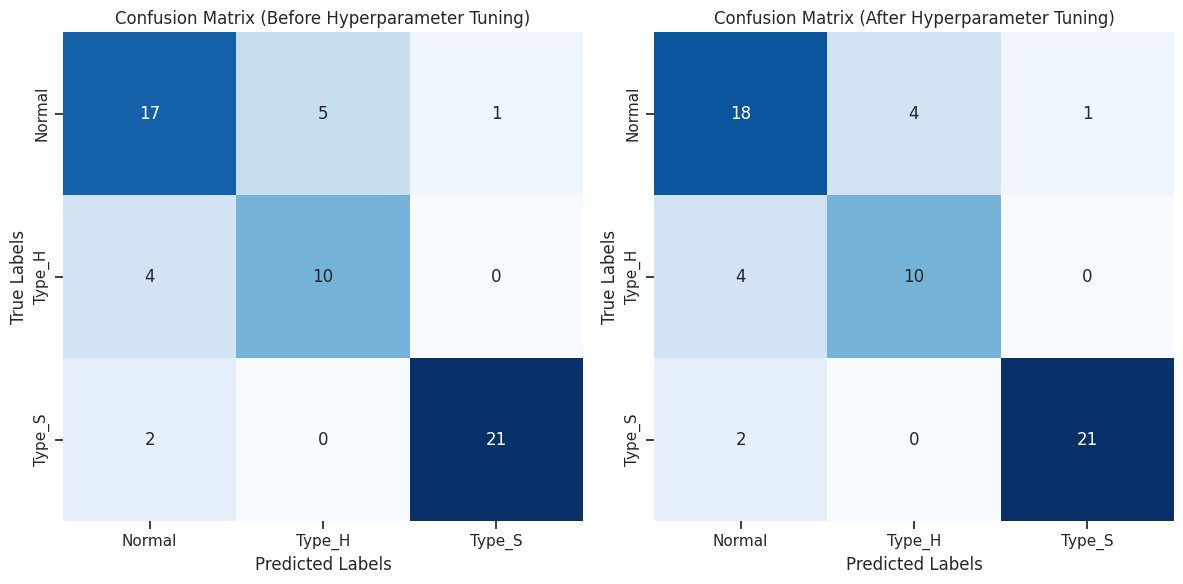

In [ ]:
# Before Hyperparameter Tuning: Original Random Forest
rf_model_original = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf_model_original.fit(X_train_resampled, y_train_resampled)
y_pred_original = rf_model_original.predict(X_test)

# After Hyperparameter Tuning: Best Random Forest from Grid Search
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_tuned = best_rf_model.predict(X_test)

# Calculate confusion matrices
conf_matrix_original = confusion_matrix(y_test, y_pred_original)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_original, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Type_H', 'Type_S'], yticklabels=['Normal', 'Type_H', 'Type_S'])
plt.title('Confusion Matrix (Before Hyperparameter Tuning)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Type_H', 'Type_S'], yticklabels=['Normal', 'Type_H', 'Type_S'])
plt.title('Confusion Matrix (After Hyperparameter Tuning)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()


## **Model Training**

In [ ]:

#Training the Final Model
final_rf_model = RandomForestClassifier(n_estimators= 50,
                                        max_depth=None,
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        random_state=0)
final_rf_model.fit(X_train_resampled, y_train_resampled)

#Evaluate on Test Data
test_accuracy = final_rf_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)



Test Accuracy: 0.8166666666666667


### ***Evaluating the model performance***

In [ ]:

# Evaluate the best model on the testing data
y_pred_best_rf = best_rf_model.predict(X_test)
classification_rep_best_rf = classification_report(y_test, y_pred_best_rf)

#Performance Analysis (using classification report)
classification_rep = classification_report(y_test, y_pred_best_rf, target_names=['Class 0', 'Class 1', 'Class 2'])
print("Classification Report:\n", classification_rep)

#Error Analysis (inspect specific cases)
incorrect_predictions = X_test[y_test != y_pred_best_rf]
incorrect_labels = y_test[y_test != y_pred_best_rf]
print("Incorrect Predictions:\n", incorrect_predictions)
print("\nTrue Labels for Incorrect Predictions:\n", incorrect_labels)


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.75      0.78      0.77        23
     Class 1       0.71      0.71      0.71        14
     Class 2       0.95      0.91      0.93        23

    accuracy                           0.82        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.82      0.82      0.82        60

Incorrect Predictions:
      P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree
9      64.311867  26.328369  50.958964  37.983498  106.177751   3.118221
109    36.686353   5.010884  41.948751  31.675469   84.241415   0.664437
97     61.446597  22.694968  46.170347  38.751628  125.670725  -2.707880
108    43.790190  13.533753  42.690814  30.256437  125.002893  13.289018
168    72.076278  18.946176  51.000000  53.130102  114.213013   1.010041
116    63.834982  20.362507  54.552434  43.472475  112.309491  -0.622527
231    69.781006  13.777465  58.000000  56.003541  118.93066

## ***Predicting with user input***

In [ ]:

# Create input widgets for each attribute
p_incidence = widgets.FloatText(value=46, description='P_incidence:')
p_tilt = widgets.FloatText(value=7.32, description='P_tilt:')
l_angle = widgets.FloatText(value=28.5454, description='L_angle:')
s_slope = widgets.FloatText(value=30.89, description='S_slope:')
p_radius = widgets.FloatText(value=120.1515, description='P_radius:')
s_degree = widgets.FloatText(value=-10.232, description='S_Degree:')

# Create a button widget
predict_button = widgets.Button(description='Predict')

# Create an output widget to display the prediction result
result_output = widgets.Output()

# Function to predict based on user input
def predict_button_clicked(x):
    new_data = pd.DataFrame({
        'P_incidence': [p_incidence.value],
        'P_tilt': [p_tilt.value],
        'L_angle': [l_angle.value],
        'S_slope': [s_slope.value],
        'P_radius': [p_radius.value],
        'S_Degree': [s_degree.value]
    })

    prediction = best_rf_model.predict(new_data)

    # Map prediction back to class label
    predicted_class = [key for key, value in class_mapping.items() if value == prediction[0]]

    with result_output:
        clear_output(wait=True)
        print(f"Predicted Class: {predicted_class[0]}")

# Attach the click event of the button to the predict function
predict_button.on_click(predict_button_clicked)

# Display the widgets
input_widgets = widgets.VBox([p_incidence, p_tilt, l_angle, s_slope, p_radius, s_degree])
display(input_widgets, predict_button, result_output)


Button(description='Predict', style=ButtonStyle())

Output()